# **fuzzy c means clustering**

## fuzzy c means clustering

**Fuzzy C-Means (FCM)** adalah teknik pengelompokan data yang sebanding dengan K-Means. Namun, FCM lebih "longgar" atau lebih fleksibel dalam menentukan keanggotaan data ke cluster. Di K-Means, satu data hanya dapat termasuk ke satu cluster, tetapi dengan porsi (bobot keanggotaan) yang berbeda.

Misalnya, satu data dapat dikirim ke cluster A sebesar 70% dan ke cluster B sebesar 30%. Teknik ini dikenal sebagai "soft clustering", berbeda dengan teknik K-Means yang dikenal sebagai "hard clustering".

.

---

### KONSEP DASAR FUZZY C-MEANS

Di FCM, tiap data punya nilai keanggotaan (disebut juga *membership degree*) terhadap semua cluster yang ada. Nilai keanggotaan ini berada di antara 0 sampai 1, dan kalau dijumlahkan ke semua cluster, hasilnya harus 1.

Komponen penting dalam FCM:

* **Data point** = data yang mau kita kelompokkan
* **Centroid** = titik pusat dari tiap cluster
* **Membership Matrix (U)** = isinya nilai keanggotaan tiap data terhadap masing-masing cluster
* **Parameter fuzziness (m)** = pengatur seberapa "kabur" keanggotaannya. Biasanya nilainya 2. Semakin besar m, semakin kabur pembagian clusternya.

---

### LANGKAH-LANGKAH FUZZY C-MEANS

Berikut alur algoritmanya secara umum:

1. **Inisialisasi Awal**

   * Tentukan jumlah cluster (*c*), parameter fuzziness (*m*), nilai toleransi konvergensi (*ε*), dan maksimum iterasi.
   * Buat matriks *membership* \$U\_{ij}\$ secara acak. Syarat:

     $$
     \sum_{j=1}^{c} U_{ij} = 1 \quad \text{untuk semua } i
     $$

2. **Hitung Titik Tengah (Centroid)**
   Gunakan rumus:

   $$
   v_j = \frac{\sum_{i=1}^{n} (U_{ij})^m \cdot x_i}{\sum_{i=1}^{n} (U_{ij})^m}
   $$

3. **Update Nilai Keanggotaan (U)**
   Rumusnya:

   $$
   U_{ij} = \frac{1}{\sum_{k=1}^c \left(\frac{||x_i - v_j||}{||x_i - v_k||}\right)^{\frac{2}{m-1}}}
   $$

4. **Cek Konvergensi**
   Kalau perubahan nilai centroid lebih kecil dari ε, atau iterasi udah maksimal, selesai. Kalau belum, ulang dari langkah 2.

---

## CONTOH PERHITUNGAN MANUAL FCM

### Data:

$X = \{1, 2, 5, 6\}$
Jumlah cluster = 2
Parameter fuzziness = 2
ε = 0.01

---

###1. Inisialisasi Matriks Keanggotaan

Bentuk matriks: 2 x 4 (karena ada 2 cluster, 4 data)
Misal kita mulai dengan:

$$
U^{(0)} = \begin{bmatrix}
0.6 & 0.5 & 0.4 & 0.3 \\
0.4 & 0.5 & 0.6 & 0.7 \\
\end{bmatrix}
$$

Sudah sesuai: jumlah keanggotaan tiap data = 1

---

###2. Hitung Centroid

Pakai rumus:

$$
v_j = \frac{\sum u_{ji}^m \cdot x_i}{\sum u_{ji}^m}
$$

#### Centroid cluster 1:

$$
v_1 = \frac{0.36 + 0.5 + 0.8 + 0.54}{0.36 + 0.25 + 0.16 + 0.09} = \frac{2.2}{0.86} \approx 2.558
$$

#### Centroid cluster 2:

$$
v_2 = \frac{0.16 + 0.5 + 1.8 + 2.94}{0.16 + 0.25 + 0.36 + 0.49} = \frac{5.4}{1.26} \approx 4.286
$$

---

### 3.Update Nilai Keanggotaan

Untuk data pertama (\$x\_1 = 1\$):

* \$|1 - 2.558| = 1.558\$
* \$|1 - 4.286| = 3.286\$

$$
u_{1,1} = \frac{1}{1 + (1.558 / 3.286)^2} \approx \frac{1}{1 + 0.2247} \approx 0.816
$$

$$
u_{2,1} = 1 - 0.816 = 0.184
$$

Lakukan hal serupa untuk data lainnya.

---

###4. Cek Konvergensi

Lihat perbedaan nilai centroid dengan iterasi sebelumnya. Kalau udah kecil (misal < 0.01), artinya sudah **konvergen**. Kalau belum, ulangi proses dari perhitungan centroid lagi.

---

###Fungsi Objektif (Objective Function)

Digunakan untuk mengukur kualitas hasil clustering:

$$
J_m = \sum_{j=1}^{c} \sum_{i=1}^{n} u_{ji}^m \cdot ||x_i - v_j||^2
$$

Nilainya seharusnya **menurun tiap iterasi**, sampai akhirnya stabil (konvergen).

---

###Rekap Iterasi:

| Iterasi | Centroid 1 | Centroid 2 | Nilai \$J\_m\$ | U\[1,1] | U\[1,2] | U\[1,3] | U\[1,4] | U\[2,1] | U\[2,2] | U\[2,3] | U\[2,4] |
| ------: | ---------: | ---------: | -------------: | ------: | ------: | ------: | ------: | ------: | ------: | ------: | ------: |
|       1 |     2.5581 |     4.2857 |         7.6292 |  0.6000 |  0.5000 |  0.4000 |  0.3000 |  0.4000 |  0.5000 |  0.6000 |  0.7000 |
|       2 |     1.6944 |     5.3258 |         2.2525 |  0.8164 |  0.9437 |  0.0788 |  0.1988 |  0.1836 |  0.0563 |  0.9212 |  0.8012 |
|       3 |     1.5100 |     5.4911 |         0.9928 |  0.9749 |  0.9916 |  0.0096 |  0.0239 |  0.0251 |  0.0084 |  0.9904 |  0.9761 |
|       4 |     1.4977 |     5.5024 |         0.9839 |  0.9873 |  0.9807 |  0.0194 |  0.0127 |  0.0127 |  0.0193 |  0.9806 |  0.9873 |

Konvergen di iterasi ke-4
Perubahan centroid sudah di bawah ambang batas  ϵ=0.01


Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

In [ ]:
import numpy as np
import pandas as pd

# Data dan parameter
X = np.array([1, 2, 5, 6])  # Data satu dimensi
c = 2                      # Jumlah cluster
m = 2.0                    # Tingkat fuzziness
epsilon = 0.01             # Ambang batas konvergensi
max_iter = 100             # Maksimum iterasi

# Inisialisasi keanggotaan U secara manual (2 x 4)
U = np.array([
    [0.6, 0.5, 0.4, 0.3],
    [0.4, 0.5, 0.6, 0.7]
])

# Fungsi untuk menghitung pusat cluster
def calculate_centroids(U, X, m):
    um = U ** m
    return (um @ X) / um.sum(axis=1)

# Fungsi untuk update U
def update_membership(X, V, m):
    n = len(X)
    c = len(V)
    U_new = np.zeros((c, n))
    for i in range(n):
        for j in range(c):
            denom_sum = 0.0
            for k in range(c):
                dist_ratio = abs(X[i] - V[j]) / abs(X[i] - V[k]) if abs(X[i] - V[k]) != 0 else 1e-10
                denom_sum += dist_ratio ** (2 / (m - 1))
            U_new[j, i] = 1.0 / denom_sum
    return U_new

# Fungsi objektif
def objective_function(U, V, X, m):
    obj = 0.0
    for j in range(c):
        for i in range(len(X)):
            obj += (U[j, i] ** m) * (abs(X[i] - V[j]) ** 2)
    return obj

# Iterasi sampai konvergen
history = []
for iteration in range(max_iter):
    V = calculate_centroids(U, X, m)
    obj = objective_function(U, V, X, m)
    history.append((iteration+1, V.copy(), U.copy(), obj))

    U_new = update_membership(X, V, m)

    if np.max(np.abs(V - calculate_centroids(U_new, X, m))) < epsilon:
        break
    U = U_new

# Konversi hasil ke DataFrame agar mudah dibaca
results = []
for iter_num, centroids, membership, obj_val in history:
    result = {
        "Iterasi": iter_num,
        "Centroid 1": centroids[0],
        "Centroid 2": centroids[1],
        "Objektif": obj_val
    }
    for j in range(c):
        for i in range(len(X)):
            result[f"U[{j+1},{i+1}]"] = membership[j, i]
    results.append(result)

df_results = pd.DataFrame(results)
df_results.round(4)  # Pembulatan 4 desimal untuk keterbacaan



,Iterasi,Centroid 1,Centroid 2,Objektif,"U[1,1]","U[1,2]","U[1,3]","U[1,4]","U[2,1]","U[2,2]","U[2,3]","U[2,4]"
0,1,2.5581,4.2857,7.6292,0.6000,0.5000,0.4000,0.3000,0.4000,0.5000,0.6000,0.7000
1,2,1.6944,5.3258,2.2525,0.8164,0.9437,0.0788,0.1988,0.1836,0.0563,0.9212,0.8012
2,3,1.5100,5.4911,0.9928,0.9749,0.9916,0.0096,0.0239,0.0251,0.0084,0.9904,0.9761
3,4,1.4977,5.5024,0.9839,0.9873,0.9807,0.0194,0.0127,0.0127,0.0193,0.9806,0.9873



## IMPLEMENTASI FUZZY C-MEANS UNTUK DATA IRIS (3 Cluster)

In [ ]:
%pip install pymysql
%pip install psycopg2
%pip install scikit-fuzzy

## Library

In [ ]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

## Ambil dan Gabungkan Data dari Database, Pisah Outliernya

In [ ]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-3fbafb7b-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_sc56Zt79uy033vzjIS4",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-16cb25be-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_MfLHp-bDUZ-2mkcA1a6",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")
df_filtered = df_merge[label == 1].drop(columns=["outlier_label"], errors='ignore')
outliers = df_merge[label == -1].drop(columns=["outlier_label"], errors='ignore')
print("\nData Outlier:")
print(outliers.to_string(index=False))
print("\nJumlah data setelah dihapus : ",len(df_filtered))
print("\nData tidak outlier :")
print(df_filtered.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  outlier_label
  1     Iris-setosa           1.4          0.2           5.1          3.5              1
  2     Iris-setosa          49.0          2.0          40.9         30.0             -1
  3     Iris-setosa           1.3          0.2           4.7          3.2              1
  4     Iris-setosa           1.5          0.2           4.6          3.1              1
  5     Iris-setosa           1.4          0.2           5.0          3.6              1
  6     Iris-setosa           1.7          0.4           5.4          3.9              1
  7     Iris-setosa           1.4          0.3           4.6          3.4              1
  8     Iris-setosa           1.5          0.2           5.0          3.4              1
  9     Iris-setosa           1.4          0.2           4.4          2.9              1
 10     Iris-setosa          14.0         20.0           4.9          3.1             -1
 11     Iris-setosa  

## Visualisasi data

### Visualisasi data asli tanpa outlier tanpa menggunakan PCA

Ini adalah visualisasi data Iris secara 2 Dimensi tanpa menggunakan PCA

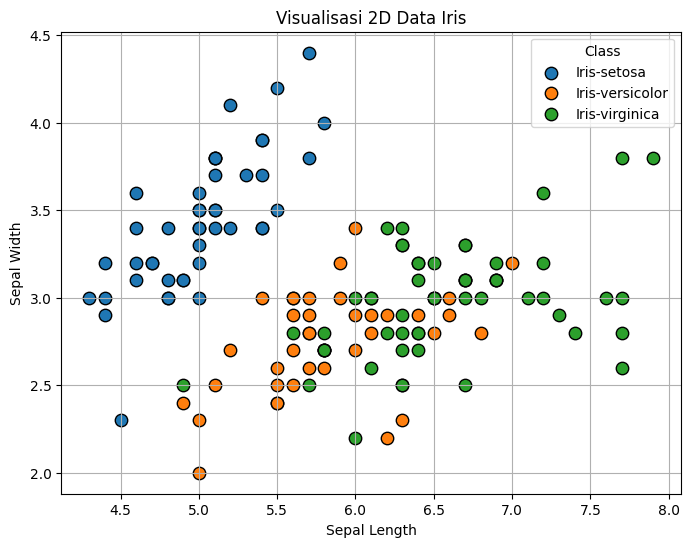

In [ ]:
# Ubah kolom 'class' menjadi kategori jika belum
df_filtered['class'] = df_filtered['class'].astype('category')

# Plot 2D scatter plot
plt.figure(figsize=(8, 6))
for label in df_filtered['class'].cat.categories:
    subset = df_filtered[df_filtered['class'] == label]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=label, s=80, edgecolors='k')

plt.title("Visualisasi 2D Data Iris")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Class')
plt.grid(True)
plt.show()

berikut adalah visualisasi data Iris secara 3 Dimensi tanpa menggunakan PCA


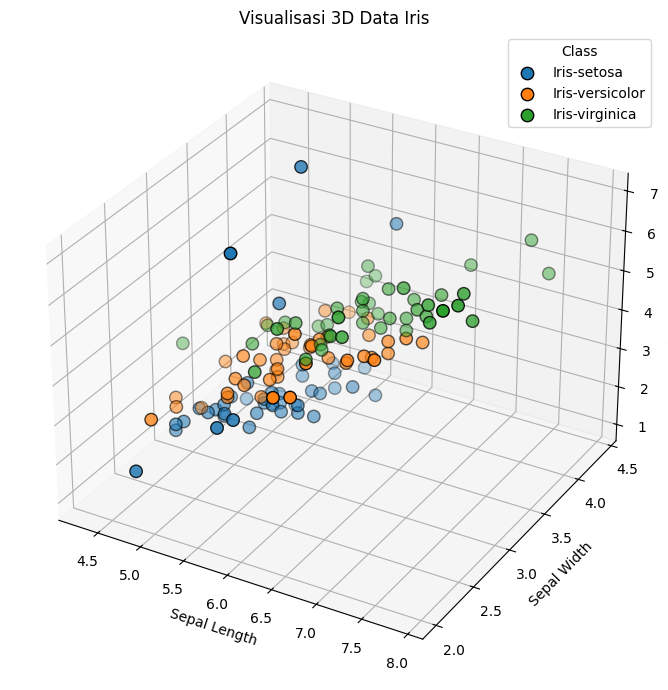

In [ ]:
df_filtered['class'] = df_filtered['class'].astype('category')

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in df_filtered['class'].cat.categories:
    subset = df_filtered[df_filtered['class'] == label]
    ax.scatter(
        subset['sepal_length'],
        subset['sepal_width'],
        subset['petal_length'],
        label=label,
        s=80,
        edgecolors='k'
    )

ax.set_title("Visualisasi 3D Data Iris")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.legend(title='Class')
plt.tight_layout()
plt.show()

## Visualisasi data asli tanpa outlier menggunakan PCA

berikut visualisasi data Iris secara 2 Dimensi menggunakan PCA

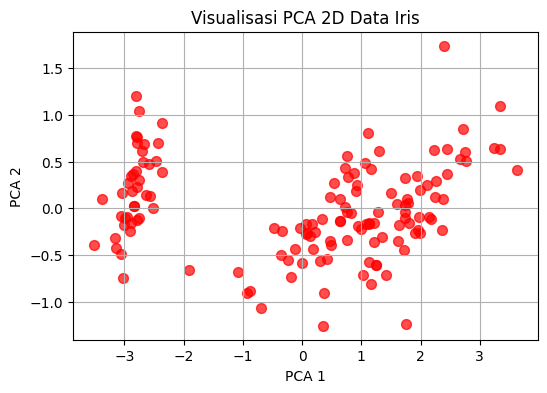

In [ ]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_filtered.drop(columns=['id', 'class'])

# PCA langsung pada data mentah (belum dinormalisasi)
pca_raw = PCA(n_components=2)
reduced_raw = pca_raw.fit_transform(features_before_scaling)

# Visualisasi 2D hasil PCA sebelum normalisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_raw[:, 0], reduced_raw[:, 1], c='red', s=50, alpha=0.7)
plt.title("Visualisasi PCA 2D Data Iris")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

berikut visualisasi data Iris secara 3 Dimensi menggunakan PCA

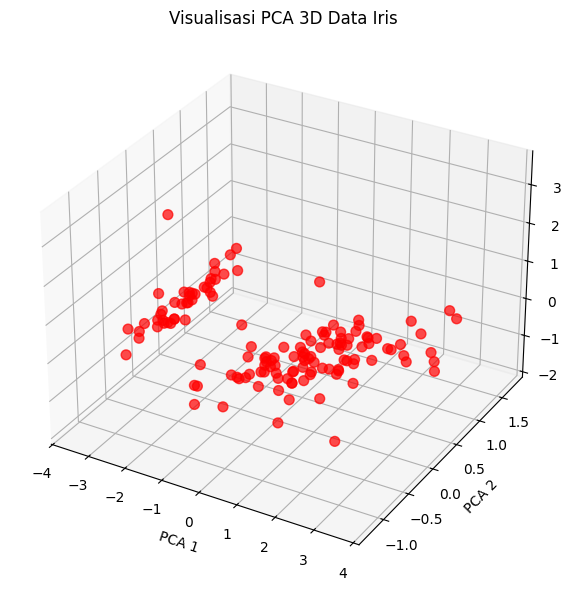

In [ ]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_filtered.drop(columns=['id', 'class'])

# PCA ke 3 komponen tanpa normalisasi
pca_raw_3d = PCA(n_components=3)
reduced_raw_3d = pca_raw_3d.fit_transform(features_before_scaling)

# Visualisasi 3D hasil PCA sebelum normalisasi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    reduced_raw_3d[:, 0],
    reduced_raw_3d[:, 1],
    reduced_raw_3d[:, 2],
    c='red',
    s=50,
    alpha=0.7
)

ax.set_title("Visualisasi PCA 3D Data Iris")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.tight_layout()
plt.show()

## Preprocessing dan Reduksi Dimensi

### Standarisasi dengan menggunakan MinMaxScaler

Dalam proses pengolahan data, saya memutuskan untuk melakukan normalisasi menggunakan MinMaxScaler. Alasan utamanya karena data yang saya gunakan memiliki skala nilai yang cukup bervariasi antar fitur. Kalau tidak dinormalisasi, fitur-fitur dengan nilai yang besar bisa mendominasi, padahal belum tentu lebih penting dari fitur lainnya. Ini bisa menimbulkan bias, terutama kalau kita menggunakan algoritma yang berbasis jarak seperti KNN atau SVM.

MinMaxScaler sendiri bekerja dengan cara mengubah nilai-nilai dalam setiap fitur agar berada dalam rentang 0 sampai 1. Nilai terkecil jadi 0, terbesar jadi 1, dan sisanya disesuaikan proporsional di antara dua titik itu. Dengan cara ini, semua fitur jadi punya "panggung" yang setara—nggak ada yang terlalu menonjol hanya karena skalanya lebih besar.

Setelah proses normalisasi ini saya terapkan, ternyata model jadi lebih stabil dan hasil prediksinya juga membaik. Dari pengalaman ini saya jadi sadar bahwa normalisasi itu bukan sekadar langkah teknis yang “harus ada”, tapi juga bagian dari usaha kita untuk menjaga kualitas data sebelum masuk ke model.

In [ ]:
# Drop kolom non-numerik
features = df_filtered.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)


Berikut adalah data hasil standarisasi menggunakan MinMaxScaler

In [ ]:
print (scaled_features);

[[0.06666667 0.05       0.22222222 0.625     ]
 [0.05       0.05       0.11111111 0.5       ]
 [0.08333333 0.05       0.08333333 0.45833333]
 [0.06666667 0.05       0.19444444 0.66666667]
 [0.11666667 0.1        0.30555556 0.79166667]
 [0.06666667 0.075      0.08333333 0.58333333]
 [0.08333333 0.05       0.19444444 0.58333333]
 [0.06666667 0.05       0.02777778 0.375     ]
 [0.08333333 0.05       0.30555556 0.70833333]
 [0.06666667 0.025      0.13888889 0.41666667]
 [0.         0.         0.         0.41666667]
 [0.03333333 0.05       0.41666667 0.83333333]
 [0.66666667 1.         0.38888889 1.        ]
 [0.05       0.1        0.30555556 0.79166667]
 [0.5        0.75       0.22222222 0.625     ]
 [0.11666667 0.075      0.38888889 0.75      ]
 [1.         0.         0.22222222 0.75      ]
 [0.11666667 0.05       0.30555556 0.58333333]
 [0.         1.         0.22222222 0.70833333]
 [0.         0.05       0.08333333 0.66666667]
 [0.15       0.05       0.13888889 0.58333333]
 [0.83333333 

## Clustering menggunakan Fuzzy C-Means

### Clustering dengan 2 cluster dan Visualisasi data

Di bagian ini, saya mencoba menerapkan clustering dengan metode Fuzzy C-Means pada data Iris, dengan jumlah cluster yang saya tentukan sebanyak 2. Prosesnya tidak hanya sampai di situ saja—saya juga menghitung pusat cluster (centroid) dan fungsi objektif di setiap iterasi untuk melihat bagaimana model berkembang sampai akhirnya konvergen.

Tujuannya adalah untuk memahami bagaimana pembagian data ke dalam dua kelompok berjalan secara bertahap, dan apakah fungsi objektifnya terus menurun seiring dengan penyempurnaan nilai keanggotaan. Dengan begitu, saya bisa memastikan bahwa algoritma bekerja sebagaimana mestinya.

Setelah proses clustering selesai dan hasilnya cukup stabil, saya lanjutkan dengan membuat visualisasi 2 dimensi dari data tersebut. Visualisasi ini membantu saya melihat pola atau pemisahan antar cluster secara lebih intuitif, terutama karena data Iris punya fitur yang bisa divisualisasikan dengan cukup baik. Dari sini, saya bisa melihat sejauh mana model berhasil mengelompokkan data berdasarkan kemiripan karakteristiknya.

[Fuzzy C-Means - 2 Clusters]
Silhouette Score: 0.5673
Fuzzy Partition Coefficient (FPC): 0.8345
Objective Function Value (Jm): 9.1353
Cluster Centers (in scaled feature space):
[[0.11139478 0.08768199 0.200969   0.56211374]
 [0.6709244  0.43499097 0.55981709 0.38836309]]
Objective Function Values per Iteration:
Iterasi 01: 17.6958
Iterasi 02: 14.6907
Iterasi 03: 13.7688
Iterasi 04: 11.1123
Iterasi 05: 9.3170
Iterasi 06: 9.1437
Iterasi 07: 9.1361
Iterasi 08: 9.1354
Iterasi 09: 9.1353
Iterasi 10: 9.1353


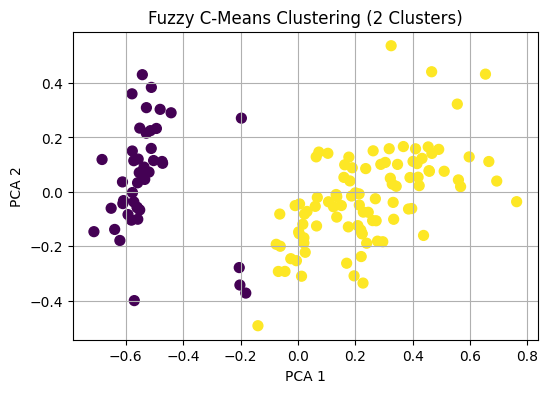

In [ ]:

# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 2
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_2 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_2)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 2 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")


# Visualisasi hasil clustering (dalam ruang PCA)
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("Fuzzy C-Means Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut ini  saya juga lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 2 Clusters]
Silhouette Score: 0.5673
Fuzzy Partition Coefficient (FPC): 0.8345
Objective Function Value (Jm): 9.1353
Cluster Centers (in scaled feature space):
[[0.11139478 0.08768199 0.200969   0.56211374]
 [0.6709244  0.43499097 0.55981709 0.38836309]]
Objective Function Values per Iteration:
Iterasi 01: 17.6958
Iterasi 02: 14.6907
Iterasi 03: 13.7688
Iterasi 04: 11.1123
Iterasi 05: 9.3170
Iterasi 06: 9.1437
Iterasi 07: 9.1361
Iterasi 08: 9.1354
Iterasi 09: 9.1353
Iterasi 10: 9.1353


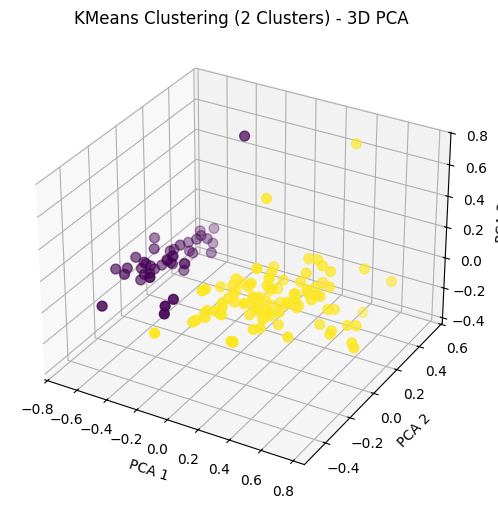

In [ ]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 2
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_2 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_2)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 2 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_2, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 3 cluster dan Visualisasi data

Di sini saya melakukan clustering pada data Iris menggunakan Fuzzy C-Means dengan jumlah cluster sebanyak 3. Saya juga menghitung pusat cluster dan fungsi objektif di setiap iterasi untuk melihat proses konvergensinya. Setelah itu, hasil clustering saya visualisasikan dalam bentuk 2 dimensi agar lebih mudah dipahami.

[Fuzzy C-Means - 3 Clusters]
Silhouette Score: 0.4358
Fuzzy Partition Coefficient (FPC): 0.7037
Objective Function Value (Jm): 5.0724
Cluster Centers (in scaled feature space):
[[0.56680208 0.35909998 0.42103035 0.3211613 ]
 [0.75304962 0.49773128 0.67383225 0.44869253]
 [0.08376465 0.06712524 0.19134869 0.5812947 ]]
Objective Function Values per Iteration:
Iterasi 01: 13.2337
Iterasi 02: 9.6362
Iterasi 03: 8.7049
Iterasi 04: 7.2893
Iterasi 05: 6.1548
Iterasi 06: 5.3518
Iterasi 07: 5.1607
Iterasi 08: 5.1055
Iterasi 09: 5.0850
Iterasi 10: 5.0772
Iterasi 11: 5.0742
Iterasi 12: 5.0731
Iterasi 13: 5.0727
Iterasi 14: 5.0725
Iterasi 15: 5.0725
Iterasi 16: 5.0724
Iterasi 17: 5.0724
Iterasi 18: 5.0724


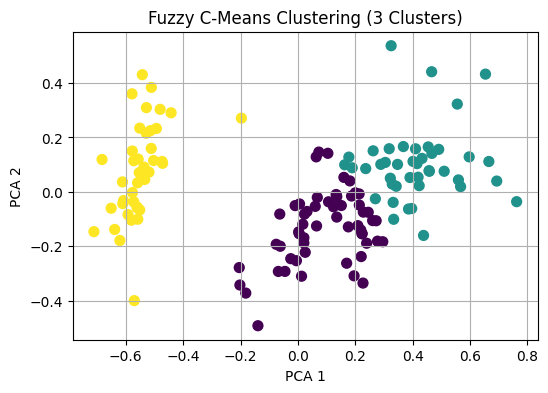

In [ ]:
# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_3 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_3)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 3 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")


# Visualisasi hasil clustering (dalam ruang PCA)
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("Fuzzy C-Means Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut ini saya juga lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 3 Clusters]
Silhouette Score: 0.4358
Fuzzy Partition Coefficient (FPC): 0.7037
Objective Function Value (Jm): 5.0724
Cluster Centers (in scaled feature space):
[[0.56680208 0.35909998 0.42103035 0.3211613 ]
 [0.75304962 0.49773128 0.67383225 0.44869253]
 [0.08376465 0.06712524 0.19134869 0.5812947 ]]
Objective Function Values per Iteration:
Iterasi 01: 13.2337
Iterasi 02: 9.6362
Iterasi 03: 8.7049
Iterasi 04: 7.2893
Iterasi 05: 6.1548
Iterasi 06: 5.3518
Iterasi 07: 5.1607
Iterasi 08: 5.1055
Iterasi 09: 5.0850
Iterasi 10: 5.0772
Iterasi 11: 5.0742
Iterasi 12: 5.0731
Iterasi 13: 5.0727
Iterasi 14: 5.0725
Iterasi 15: 5.0725
Iterasi 16: 5.0724
Iterasi 17: 5.0724
Iterasi 18: 5.0724


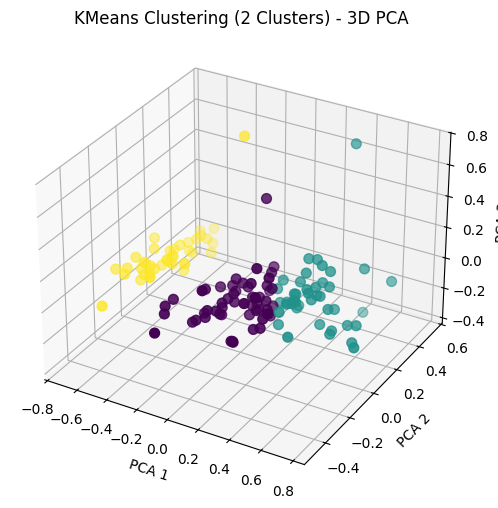

In [ ]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_3 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_3)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 3 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_3, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 4 cluster dan Visualisasi data

Saya melakukan clustering pada data Iris menggunakan Fuzzy C-Means dengan 4 cluster. Selama prosesnya, saya menghitung pusat cluster dan fungsi objektif di setiap iterasi. Setelah itu, hasilnya saya visualisasikan dalam bentuk 2 dimensi untuk melihat pola pengelompokan yang terbentuk.

[Fuzzy C-Means - 4 Clusters]
Silhouette Score: 0.3602
Fuzzy Partition Coefficient (FPC): 0.6072
Objective Function Value (Jm): 3.6906
Cluster Centers (in scaled feature space):
[[0.07947554 0.06299575 0.18999852 0.58416178]
 [0.78233497 0.5166331  0.71497845 0.46360872]
 [0.50875157 0.31979078 0.35877809 0.28407199]
 [0.64468307 0.41667743 0.53097449 0.37797922]]
Objective Function Values per Iteration:
Iterasi 01: 10.1633
Iterasi 02: 7.3844
Iterasi 03: 7.0706
Iterasi 04: 5.9749
Iterasi 05: 4.5429
Iterasi 06: 4.1642
Iterasi 07: 3.9859
Iterasi 08: 3.8177
Iterasi 09: 3.7327
Iterasi 10: 3.7054
Iterasi 11: 3.6965
Iterasi 12: 3.6931
Iterasi 13: 3.6917
Iterasi 14: 3.6911
Iterasi 15: 3.6908
Iterasi 16: 3.6907
Iterasi 17: 3.6906
Iterasi 18: 3.6906
Iterasi 19: 3.6906
Iterasi 20: 3.6906
Iterasi 21: 3.6906


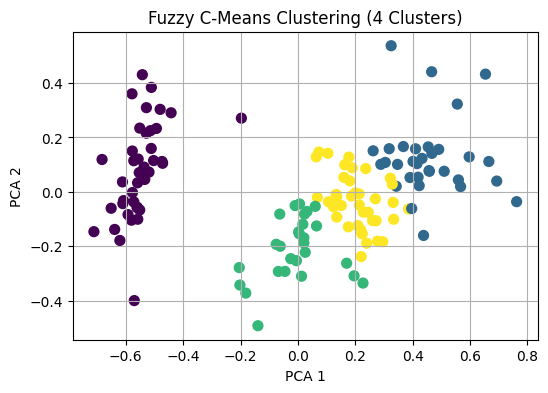

In [ ]:
# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 4
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_4 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_4)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 4 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")


# Visualisasi hasil clustering (dalam ruang PCA)
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("Fuzzy C-Means Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut ini saya juga melakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 4 Clusters]
Silhouette Score: 0.3602
Fuzzy Partition Coefficient (FPC): 0.6072
Objective Function Value (Jm): 3.6906
Cluster Centers (in scaled feature space):
[[0.07947554 0.06299575 0.18999852 0.58416178]
 [0.78233497 0.5166331  0.71497845 0.46360872]
 [0.50875157 0.31979078 0.35877809 0.28407199]
 [0.64468307 0.41667743 0.53097449 0.37797922]]
Objective Function Values per Iteration:
Iterasi 01: 10.1633
Iterasi 02: 7.3844
Iterasi 03: 7.0706
Iterasi 04: 5.9749
Iterasi 05: 4.5429
Iterasi 06: 4.1642
Iterasi 07: 3.9859
Iterasi 08: 3.8177
Iterasi 09: 3.7327
Iterasi 10: 3.7054
Iterasi 11: 3.6965
Iterasi 12: 3.6931
Iterasi 13: 3.6917
Iterasi 14: 3.6911
Iterasi 15: 3.6908
Iterasi 16: 3.6907
Iterasi 17: 3.6906
Iterasi 18: 3.6906
Iterasi 19: 3.6906
Iterasi 20: 3.6906
Iterasi 21: 3.6906


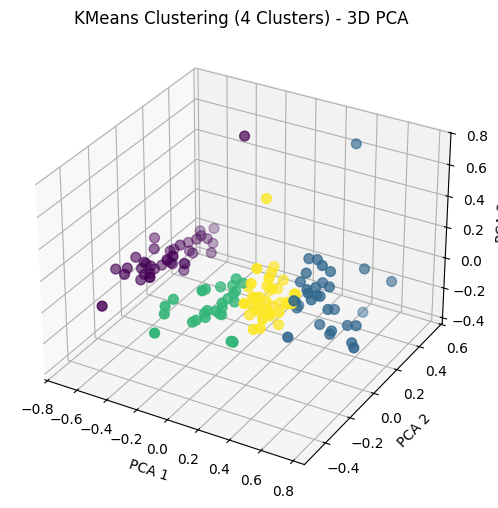

In [ ]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Fuzzy C-Means clustering
n_clusters = 4
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_4 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_4)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 4 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_4,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (4 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()
